In [1]:
using DataFrames, PyPlot, ScikitLearn, LowRankModels
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

First, we read the training set and the test set

In [2]:
data = readtable("HCMST_train_cleaned.csv")
datatest = readtable("HCMST_test_cleaned.csv")

datascale = readtable("HCMST_train_cleaned_scale.csv")
datatestscale = readtable("HCMST_test_cleaned_scale.csv");

Convert to proper typing and perform least squares using the backslack operator

In [3]:
Xtrain = [convert(Array{Float64}, data[:,4:116]) ones(2033)]
ytrain = Array(data[:,117])
Xtest = [convert(Array{Float64}, datatest[:,4:116]) ones(558)]
ytest = Array(datatest[:,117])
w = Xtrain\ytrain;

Append an index to the w vecor and sort by the magnitude of w

In [4]:
wsort = [w linspace(1, 114, 114)];
sortrows(wsort,by=x->x[1])

114×2 Array{Float64,2}:
 -0.805988  114.0
 -0.303333   27.0
 -0.300544   49.0
 -0.270978    8.0
 -0.2703     28.0
 -0.265135   10.0
 -0.261495    7.0
 -0.232354   29.0
 -0.230937   50.0
 -0.175185  113.0
 -0.173973   69.0
 -0.17383    52.0
 -0.170288   40.0
  ⋮              
  0.254454  106.0
  0.313655   57.0
  0.317657   24.0
  0.343416   56.0
  0.365173   70.0
  0.390402   55.0
  0.391177   65.0
  0.428844   79.0
  0.435176   63.0
  0.461184   64.0
  0.48882    80.0
  0.584233   60.0

Using a scaled version of the dataset, convert to proper typing

In [5]:
Xscaledtrain = [convert(Array{Float64}, datascale[:,4:116]) ones(2033)]
yscaledtrain = Array(datascale[:,117])
Xscaledtest = [convert(Array{Float64}, datatestscale[:,4:116]) ones(558)]
yscaledtest = Array(datatestscale[:,117]);

Define the convergence history and run the proximal gradient method in an attempt to replicate least squares

In [8]:
ch = ConvergenceHistory("quad")
wls = proxgrad(QuadLoss(), ZeroReg(), Xscaledtrain, yscaledtrain, maxiters=25000, stepsize=1/(2*norm(Xscaledtrain)^2), ch=ch);

Divide each w by the scaling factor applied to standardize the magnitude of the feature space, append an index and sort by the magnitude of w

In [9]:
wls[1] = wls[1] / 10
wls[2] = wls[2] / 10
wls[5] = wls[5] / 10
wls[6] = wls[6] / 100
wls[22] = wls[22] / 10
wls[54] = wls[54] / 10
wls[58] = wls[58] / 100
wls[59] = wls[59] / 10
wls[61] = wls[61] / 100
wls[62] = wls[62] / 100
wls[110] = wls[110] / 10000
wls[112] = wls[112] / 100
wls[113] = wls[113] / 10

wlssort = [wls linspace(1, 114, 114)]
sortrows(wlssort,by=x->x[1])

114×2 Array{Float64,2}:
 -0.467789  114.0
 -0.305377   49.0
 -0.237497   50.0
 -0.212058    8.0
 -0.210243   10.0
 -0.205046    7.0
 -0.19605    40.0
 -0.188164   27.0
 -0.18126    39.0
 -0.180143   52.0
 -0.176104  113.0
 -0.175693   45.0
 -0.174963   69.0
  ⋮              
  0.220567   80.0
  0.237939    9.0
  0.246721   56.0
  0.251194  105.0
  0.262101  106.0
  0.293586   55.0
  0.315025   24.0
  0.351638   65.0
  0.365042   70.0
  0.396419   63.0
  0.422489   64.0
  0.583277   60.0

Plot the convergence history to show that the proximal gradient method is converging to a solution

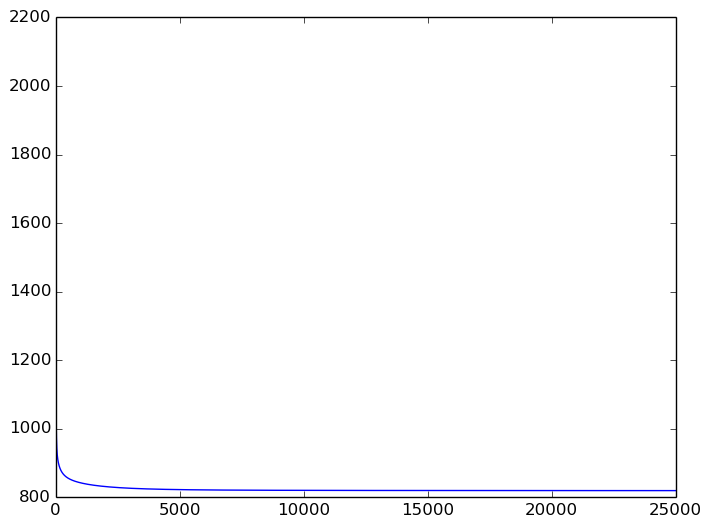

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9b727ac450>

In [9]:
plot(ch.objective)

Define the convergence history and run the proximal gradient method with hinge loss and a quadratic regularizer

In [10]:
ch = ConvergenceHistory("hinge")
whinge = proxgrad(HingeLoss(), QuadReg(), Xscaledtrain, yscaledtrain, maxiters=25000, stepsize=1/(2*norm(Xscaledtrain)^2),ch = ch);

Divide each w by the scaling factor applied to standardize the magnitude of the feature space, append an index and sort by the magnitude of w

In [11]:
whinge[1] = whinge[1] / 10
whinge[2] = whinge[2] / 10
whinge[5] = whinge[5] / 10
whinge[6] = whinge[6] / 100
whinge[22] = whinge[22] / 10
whinge[54] = whinge[54] / 10
whinge[58] = whinge[58] / 100
whinge[59] = whinge[59] / 10
whinge[61] = whinge[61] / 100
whinge[62] = whinge[62] / 100
whinge[110] = whinge[110] / 10000
whinge[112] = whinge[112] / 100
whinge[113] = whinge[113] / 10

whingesort = [whinge linspace(1, 114, 114)]
sortrows(whingesort,by=x->x[1])

114×2 Array{Float64,2}:
 -0.442946   114.0
 -0.340543     8.0
 -0.223227    40.0
 -0.214861     7.0
 -0.205457    80.0
 -0.199758    50.0
 -0.176779    12.0
 -0.174546    27.0
 -0.169357    79.0
 -0.159105    41.0
 -0.158992    43.0
 -0.154474    28.0
 -0.15129     57.0
  ⋮               
  0.0592015   18.0
  0.0605512   76.0
  0.061102    48.0
  0.0717213   68.0
  0.0739467  105.0
  0.0748563  106.0
  0.0827893   24.0
  0.087202    19.0
  0.136938    74.0
  0.404509     9.0
  0.66604     70.0
  1.24941     60.0

Plot the convergence history to show that the proximal gradient method is converging to a solution

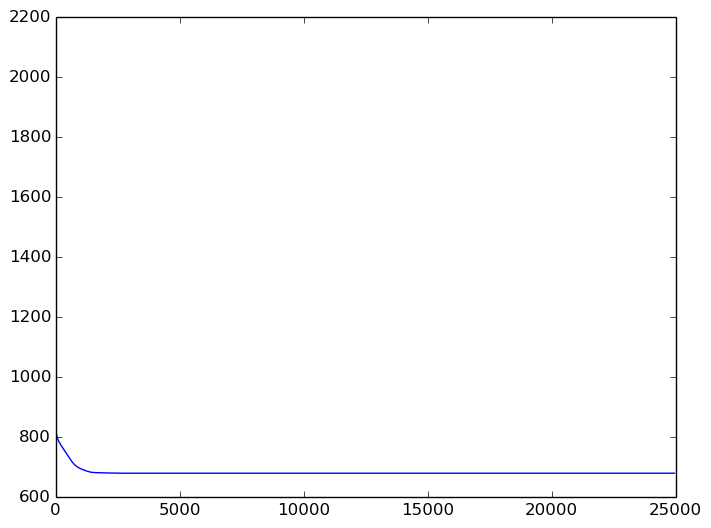

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02f84b0450>

In [12]:
plot(ch.objective)

Define the convergence history and run the proximal gradient method with logistic loss and a quadratic regularizer

In [13]:
ch = ConvergenceHistory("logistic")
wlogistic = proxgrad(LogisticLoss(), QuadReg(), Xscaledtrain, yscaledtrain, maxiters=25000, stepsize=1/(2*norm(Xscaledtrain)^2),ch = ch);

Divide each w by the scaling factor applied to standardize the magnitude of the feature space, append an index and sort by the magnitude of w

In [14]:
wlogistic[1] = wlogistic[1] / 10
wlogistic[2] = wlogistic[2] / 10
wlogistic[5] = wlogistic[5] / 10
wlogistic[6] = wlogistic[6] / 100
wlogistic[22] = wlogistic[22] / 10
wlogistic[54] = wlogistic[54] / 10
wlogistic[58] = wlogistic[58] / 100
wlogistic[59] = wlogistic[59] / 10
wlogistic[61] = wlogistic[61] / 100
wlogistic[62] = wlogistic[62] / 100
wlogistic[110] = wlogistic[110] / 10000
wlogistic[112] = wlogistic[112] / 100
wlogistic[113] = wlogistic[113] / 10

wlogisticsort = [wlogistic linspace(1, 114, 114)]
sortrows(wlogisticsort,by=x->x[1])

114×2 Array{Float64,2}:
 -1.00373     7.0
 -0.505496  114.0
 -0.489241   50.0
 -0.482253   72.0
 -0.458735   71.0
 -0.452252   49.0
 -0.364681   53.0
 -0.347825   98.0
 -0.325241   43.0
 -0.297158   73.0
 -0.290137   27.0
 -0.260078   39.0
 -0.255858   41.0
  ⋮              
  0.325298   48.0
  0.333458   97.0
  0.35369    18.0
  0.40721    76.0
  0.413175  105.0
  0.495034  101.0
  0.520703  106.0
  0.673775   68.0
  0.684925   24.0
  0.789945    9.0
  0.940805   70.0
  1.46792    60.0

Plot the convergence history to show that the proximal gradient method is converging to a solution

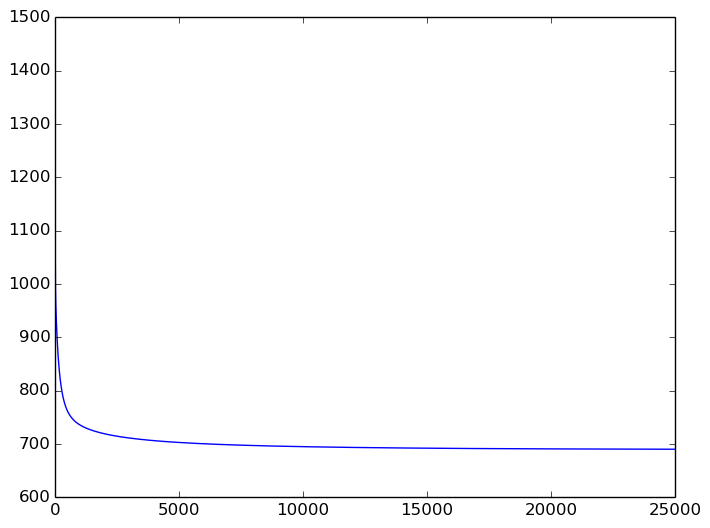

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02f8334f50>

In [15]:
plot(ch.objective)

Multiply the feature space of the training set by the corresponding values of w to predict the response for each row

In [16]:
yhatLS = Xtrain*w
yhatHinge = Xscaledtrain*whinge
yhatLogistic = Xscaledtrain*wlogistic;

Calculate the misclassification rate for each method on the training set and the test set

In [25]:
misclassifiedHingeTrain = 0 
for i in 1:2033
    if sign(yhatHinge[i]) != ytrain[i]
        misclassifiedHingeTrain = misclassifiedHingeTrain + 1
    end
end
percentmisclassifiedHingeTrain = misclassifiedHingeTrain/2033
@show percentmisclassifiedHingeTrain;

percentmisclassifiedHingeTrain = 0.16527299557304476


In [26]:
misclassifiedHingeTest = 0 
for i in 1:558
    if sign(yhatHinge[i]) != ytest[i]
        misclassifiedHingeTest = misclassifiedHingeTest + 1
    end
end
percentmisclassifiedHingeTest = misclassifiedHingeTest/558
@show percentmisclassifiedHingeTest;

percentmisclassifiedHingeTest = 0.34767025089605735


In [27]:
misclassifiedLogisticTrain = 0 
for i in 1:2033
    if sign(yhatLogistic[i]) != ytrain[i]
        misclassifiedLogisticTrain = misclassifiedLogisticTrain + 1
    end
end
percentmisclassifiedLogisticTrain = misclassifiedLogisticTrain/2033
@show percentmisclassifiedLogisticTrain;

percentmisclassifiedLogisticTrain = 0.20708312838170193


In [28]:
misclassifiedLogisticTest = 0 
for i in 1:558
    if sign(yhatLogistic[i]) != ytest[i]
        misclassifiedLogisticTest = misclassifiedLogisticTest + 1
    end
end
percentmisclassifiedLogisticTrain = misclassifiedLogisticTest/558
@show percentmisclassifiedLogisticTrain;

percentmisclassifiedLogisticTrain = 0.4103942652329749


In [29]:
misclassifiedLSTrain = 0 
for i in 1:2033
    if sign(yhatLS[i]) != ytrain[i]
        misclassifiedLSTrain = misclassifiedLSTrain + 1
    end
end
percentmisclassifiedLSTrain = misclassifiedLSTrain/2033
@show percentmisclassifiedLSTrain;

percentmisclassifiedLSTrain = 0.13428430890309886


In [30]:
misclassifiedLSTest = 0 
for i in 1:558
    if sign(yhatLS[i]) != ytest[i]
        misclassifiedLSTest = misclassifiedLSTest + 1
    end
end
percentmisclassifiedLSTest = misclassifiedLSTest/558
@show percentmisclassifiedLSTest;

percentmisclassifiedLSTest = 0.2974910394265233
